In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import torch
import cv2
import PIL
rl_path='/home/ypengbx/rl-world/vid_wm/ivideogpt/trm-eval/2025-05-27-13:36:00-vgpt_small_ctx_msp8_head12_fulleval_rlvr_debug'
base_path='/home/ypengbx/rl-world/vid_wm/ivideogpt/trm-eval/2025-05-27-13:36:34-vgpt_small_ctx_msp8_head12_fulleval_base_debug'
rl_image_path=os.path.join(rl_path, 'compare','val-samples-0')
base_image_path=os.path.join(base_path, 'compare','val-samples-0')
rl_statistics_path=os.path.join(rl_path, 'statistics')
base_statistics_path=os.path.join(base_path, 'statistics')

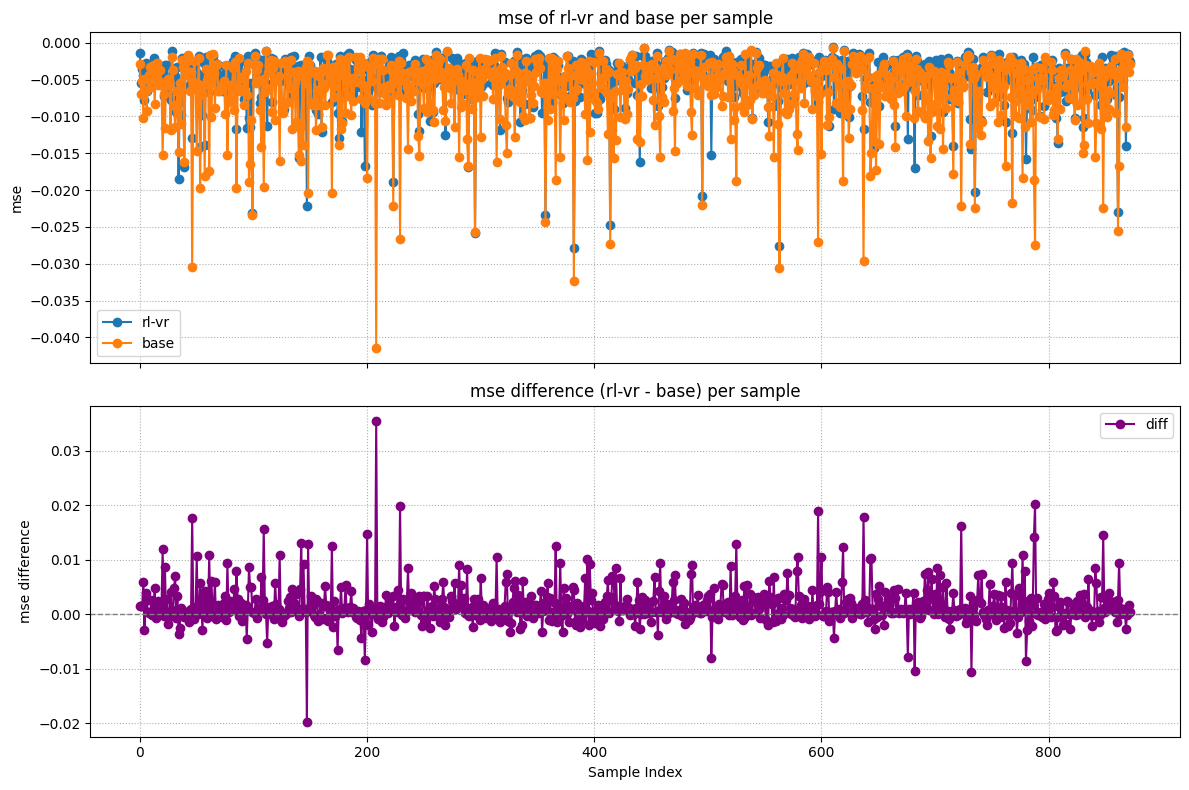

In [3]:
# read mse statistics
rl_mse=-np.load(os.path.join(rl_statistics_path, 'mse.npy'))
base_mse=-np.load(os.path.join(base_statistics_path, 'mse.npy'))
x=np.arange(len(rl_mse))

# delta mse
diff = rl_mse - base_mse

fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# compare mse
axs[0].plot(x, rl_mse, label='rl-vr', marker='o')
axs[0].plot(x, base_mse, label='base', marker='o')
axs[0].set_ylabel('mse')
axs[0].set_title('mse of rl-vr and base per sample')
axs[0].legend()
axs[0].grid(True, linestyle=':')

# delta mse
axs[1].plot(x, diff, label='diff', color='purple', marker='o')
axs[1].axhline(0, color='gray', linestyle='--', linewidth=1)
axs[1].set_xlabel('Sample Index')
axs[1].set_ylabel('mse difference')
axs[1].set_title('mse difference (rl-vr - base) per sample')
axs[1].legend()
axs[1].grid(True, linestyle=':')

plt.tight_layout()
plt.show()


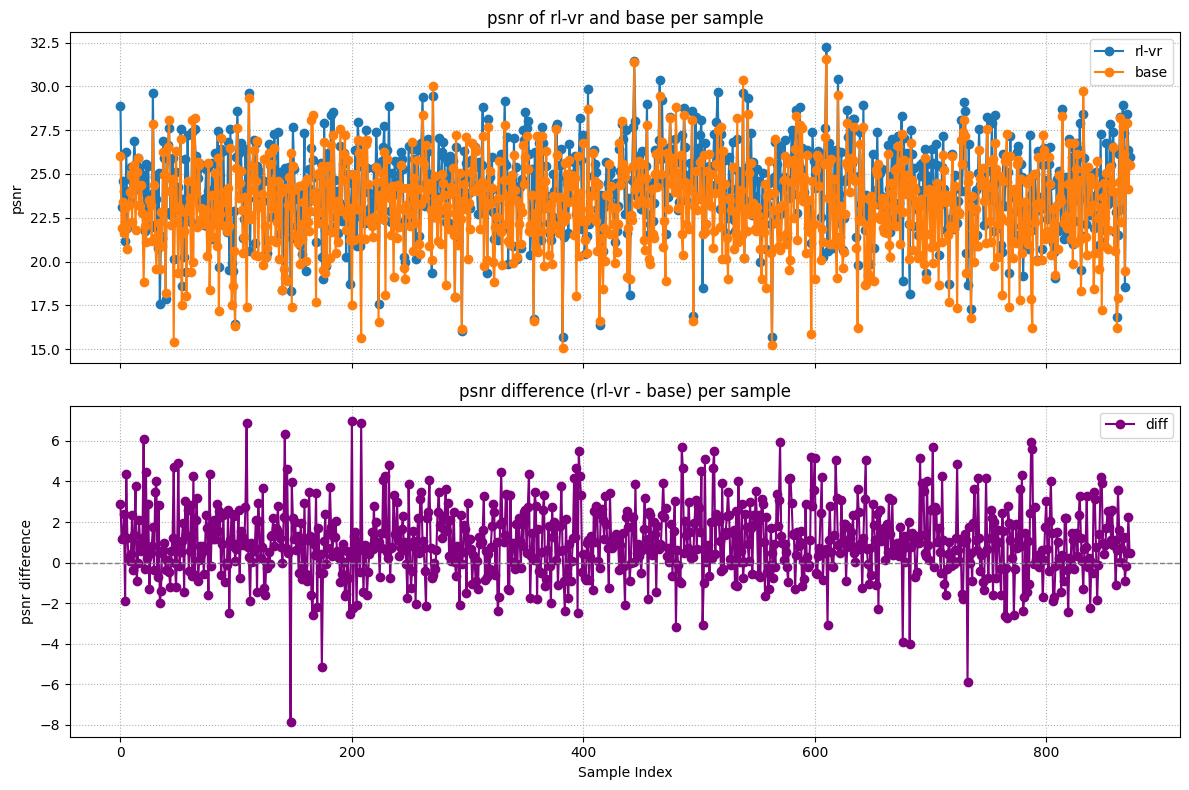

In [11]:
# read mse statistics
rl_psnr=np.load(os.path.join(rl_statistics_path, 'psnr.npy'))
base_psnr=np.load(os.path.join(base_statistics_path, 'psnr.npy'))
x=np.arange(len(rl_psnr))

# delta mse
diff = rl_psnr - base_psnr

fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# compare mse
axs[0].plot(x, rl_psnr, label='rl-vr', marker='o')
axs[0].plot(x, base_psnr, label='base', marker='o')
axs[0].set_ylabel('psnr')
axs[0].set_title('psnr of rl-vr and base per sample')
axs[0].legend()
axs[0].grid(True, linestyle=':')

# delta mse
axs[1].plot(x, diff, label='diff', color='purple', marker='o')
axs[1].axhline(0, color='gray', linestyle='--', linewidth=1)
axs[1].set_xlabel('Sample Index')
axs[1].set_ylabel('psnr difference')
axs[1].set_title('psnr difference (rl-vr - base) per sample')
axs[1].legend()
axs[1].grid(True, linestyle=':')

plt.tight_layout()
plt.show()


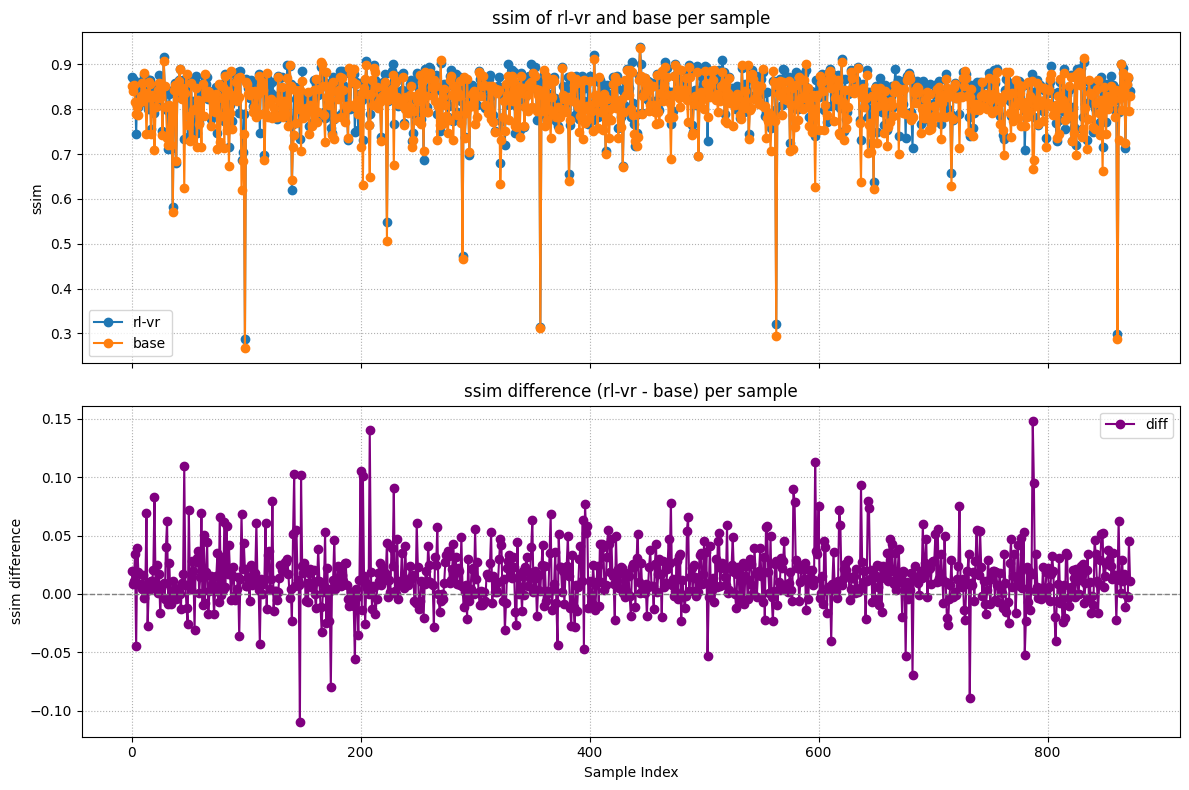

In [12]:
# read mse statistics
rl_ssim=np.load(os.path.join(rl_statistics_path, 'ssim.npy'))
base_ssim=np.load(os.path.join(base_statistics_path, 'ssim.npy'))
x=np.arange(len(rl_ssim))

# delta mse
diff = rl_ssim - base_ssim

fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# compare mse
axs[0].plot(x, rl_ssim, label='rl-vr', marker='o')
axs[0].plot(x, base_ssim, label='base', marker='o')
axs[0].set_ylabel('ssim')
axs[0].set_title('ssim of rl-vr and base per sample')
axs[0].legend()
axs[0].grid(True, linestyle=':')

# delta mse
axs[1].plot(x, diff, label='diff', color='purple', marker='o')
axs[1].axhline(0, color='gray', linestyle='--', linewidth=1)
axs[1].set_xlabel('Sample Index')
axs[1].set_ylabel('ssim difference')
axs[1].set_title('ssim difference (rl-vr - base) per sample')
axs[1].legend()
axs[1].grid(True, linestyle=':')

plt.tight_layout()
plt.show()


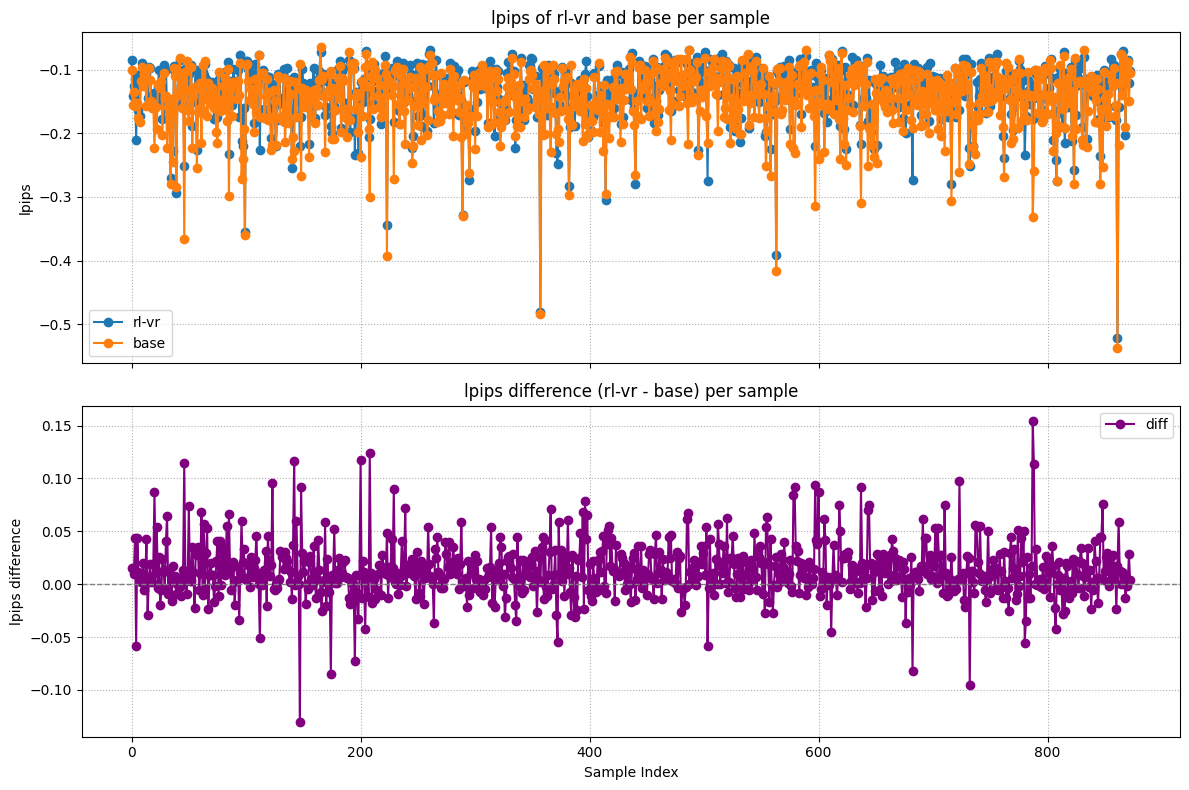

In [14]:
# read mse statistics
rl_lpips=-np.load(os.path.join(rl_statistics_path, 'lpips.npy'))
base_lpips=-np.load(os.path.join(base_statistics_path, 'lpips.npy'))
x=np.arange(len(rl_lpips))

# delta mse
diff = rl_lpips - base_lpips

fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# compare mse
axs[0].plot(x, rl_lpips, label='rl-vr', marker='o')
axs[0].plot(x, base_lpips, label='base', marker='o')
axs[0].set_ylabel('lpips')
axs[0].set_title('lpips of rl-vr and base per sample')
axs[0].legend()
axs[0].grid(True, linestyle=':')

# delta mse
axs[1].plot(x, diff, label='diff', color='purple', marker='o')
axs[1].axhline(0, color='gray', linestyle='--', linewidth=1)
axs[1].set_xlabel('Sample Index')
axs[1].set_ylabel('lpips difference')
axs[1].set_title('lpips difference (rl-vr - base) per sample')
axs[1].legend()
axs[1].grid(True, linestyle=':')

plt.tight_layout()
plt.show()


In [14]:
# get the index of 5 highest mse samples
idx = np.argsort(rl_mse-base_mse)
# 取最大的5个，倒序
top5_idx = idx[0:10]
top5_idx

array([147, 732, 682, 780, 198, 503, 676, 174, 112,  94])

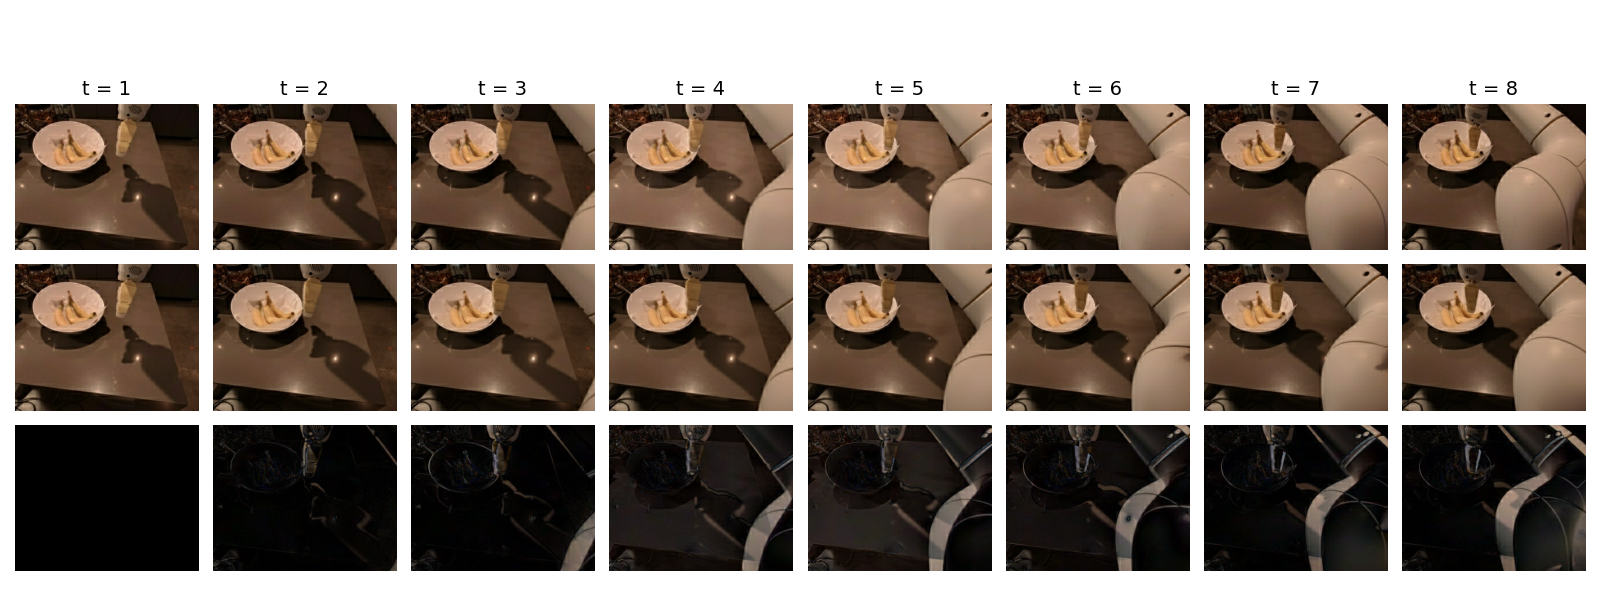

In [13]:
# show the image
choose=top5_idx[4]
image_path = os.path.join(rl_image_path, f'val-samples-0-{choose}.png')
img=PIL.Image.open(image_path)
img